In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wind-power-production-us-2001-2023/wind-power-production-us.csv


In [38]:
import warnings
warnings.filterwarnings("ignore")

From: [this link](https://www.eia.gov/electricity/data/browser/#/topic/0?agg=2,1,0&fuel=028&geo=vvvvvvvvvvvvo&sec=g&linechart=ELEC.GEN.AOR-US-99.Q&columnchart=ELEC.GEN.AOR-US-99.Q&map=ELEC.GEN.AOR-US-99.Q&freq=Q&chartindexed=2&ctype=map&ltype=sourcekey&rtype=s&maptype=0&rse=0&pin=)

In [3]:
sns.set_style('darkgrid')

In [4]:
%matplotlib inline

In [5]:
data = pd.read_csv('/kaggle/input/wind-power-production-us-2001-2023/wind-power-production-us.csv')
data.set_index('date', inplace = True)

In [6]:
data.head()

,other_united_states,other_new_england,other_connecticut,other_maine,other_massachusetts,other_new_hampshire,other_rhode_island,other_vermont,other_middle_atlantic,other_new_jersey,...,wind_new_mexico,wind_utah,wind_wyoming,wind_pacific_contiguous,wind_california,wind_oregon,wind_washington,wind_pacific_noncontiguous,wind_alaska,wind_hawaii
date,,,,,,,,,,,,,,,,,,,,,
Jan 2001,6025,678,75,348,113,91,10,42,371,66,...,--,--,26,137,133,3,--,0,0,0
Feb 2001,5310,599,77,293,103,83,9,35,338,59,...,--,--,23,151,148,3,--,0,0,0
Mar 2001,5795,660,96,327,101,93,9,33,381,73,...,--,--,22,308,300,8,--,0,0,0
Apr 2001,5827,593,92,277,106,81,9,27,361,66,...,--,--,13,399,393,6,--,0,0,0
May 2001,5738,640,72,336,109,86,9,27,392,73,...,--,--,16,383,378,6,--,0,0,0


In [7]:
data.tail()

,other_united_states,other_new_england,other_connecticut,other_maine,other_massachusetts,other_new_hampshire,other_rhode_island,other_vermont,other_middle_atlantic,other_new_jersey,...,wind_new_mexico,wind_utah,wind_wyoming,wind_pacific_contiguous,wind_california,wind_oregon,wind_washington,wind_pacific_noncontiguous,wind_alaska,wind_hawaii
date,,,,,,,,,,,,,,,,,,,,,
Oct 2022,50478,998,89,377,287,105,76,64,1429,196,...,966,34,725,2456,1006,709,741,52,12,40
Nov 2022,56144,1084,83,488,224,139,58,93,1497,150,...,1345,71,935,2904,1284,785,835,80,15,65
Dec 2022,52394,1070,78,481,201,137,66,106,1443,137,...,1548,71,1143,2660,1207,698,756,62,14,48
Jan 2023,53152,983,80,429,217,118,64,75,1278,149,...,1681,78,922,2771,1381,687,703,43,12,31
Feb 2023,56626,962,75,416,221,100,62,87,1522,148,...,1357,70,995,3200,1305,948,947,81,15,66


In [8]:
data.columns.to_list()[:3]

['other_united_states', 'other_new_england', 'other_connecticut']

In [9]:
data.index = pd.to_datetime(data.index)

### Feature Engineering

In [10]:
year = pd.DatetimeIndex(data.index).year
month = pd.DatetimeIndex(data.index).month
data.insert(loc = 0, column = 'Year', value = year)
data.insert(loc = 0, column = 'Month', value = month)

In [11]:
def column_name_fixer(list):
    new_list = []
    for item in list:
        a = item.split('_')
        a = '_'.join(a).replace("_", " ").split()
        a = [a.upper() for a in a[1:]] + [a[0]]
        a = ' '.join(a)
        new_list.append(a)
    return new_list
    
new_col_list = column_name_fixer(data.columns.to_list())
data = data.rename(columns = dict(zip(data.columns, new_col_list)))

In [12]:
data.head()

,Month,Year,UNITED STATES other,NEW ENGLAND other,CONNECTICUT other,MAINE other,MASSACHUSETTS other,NEW HAMPSHIRE other,RHODE ISLAND other,VERMONT other,...,NEW MEXICO wind,UTAH wind,WYOMING wind,PACIFIC CONTIGUOUS wind,CALIFORNIA wind,OREGON wind,WASHINGTON wind,PACIFIC NONCONTIGUOUS wind,ALASKA wind,HAWAII wind
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1,2001,6025,678,75,348,113,91,10,42,...,--,--,26,137,133,3,--,0,0,0
2001-02-01,2,2001,5310,599,77,293,103,83,9,35,...,--,--,23,151,148,3,--,0,0,0
2001-03-01,3,2001,5795,660,96,327,101,93,9,33,...,--,--,22,308,300,8,--,0,0,0
2001-04-01,4,2001,5827,593,92,277,106,81,9,27,...,--,--,13,399,393,6,--,0,0,0
2001-05-01,5,2001,5738,640,72,336,109,86,9,27,...,--,--,16,383,378,6,--,0,0,0


In [13]:
total_energy = pd.DataFrame(data = (data['UNITED STATES other'] + data['UNITED STATES wind']), columns = ['Total Energy Produced USA'])
data['Total Energy Produced USA'] = total_energy['Total Energy Produced USA']

In [14]:
data.isnull().sum().sort_values(ascending = False)

wind                         266
Year                           0
FLORIDA wind                   0
DISTRICT OF COLUMBIA wind      0
DELAWARE wind                  0
                            ... 
WEST VIRGINIA other            0
VIRGINIA other                 0
SOUTH CAROLINA other           0
NORTH CAROLINA other           0
Total Energy Produced USA      0
Length: 128, dtype: int64

In [15]:
data.drop('wind', axis =1 ,inplace = True)

In [16]:
#We can see, that the region is displayed before its respective states are listed...
data.columns[0:45]

Index(['Month', 'Year', 'UNITED STATES other', 'NEW ENGLAND other',
       'CONNECTICUT other', 'MAINE other', 'MASSACHUSETTS other',
       'NEW HAMPSHIRE other', 'RHODE ISLAND other', 'VERMONT other',
       'MIDDLE ATLANTIC other', 'NEW JERSEY other', 'NEW YORK other',
       'PENNSYLVANIA other', 'EAST NORTH CENTRAL other', 'ILLINOIS other',
       'INDIANA other', 'MICHIGAN other', 'OHIO other', 'WISCONSIN other',
       'WEST NORTH CENTRAL other', 'IOWA other', 'KANSAS other',
       'MINNESOTA other', 'MISSOURI other', 'NEBRASKA other',
       'NORTH DAKOTA other', 'SOUTH DAKOTA other', 'SOUTH ATLANTIC other',
       'DELAWARE other', 'DISTRICT OF COLUMBIA other', 'FLORIDA other',
       'GEORGIA other', 'MARYLAND other', 'NORTH CAROLINA other',
       'SOUTH CAROLINA other', 'VIRGINIA other', 'WEST VIRGINIA other',
       'EAST SOUTH CENTRAL other', 'ALABAMA other', 'KENTUCKY other',
       'MISSISSIPPI other', 'TENNESSEE other', 'WEST SOUTH CENTRAL other',
       'ARKANSAS oth

## Becoming One with Data (EDA)

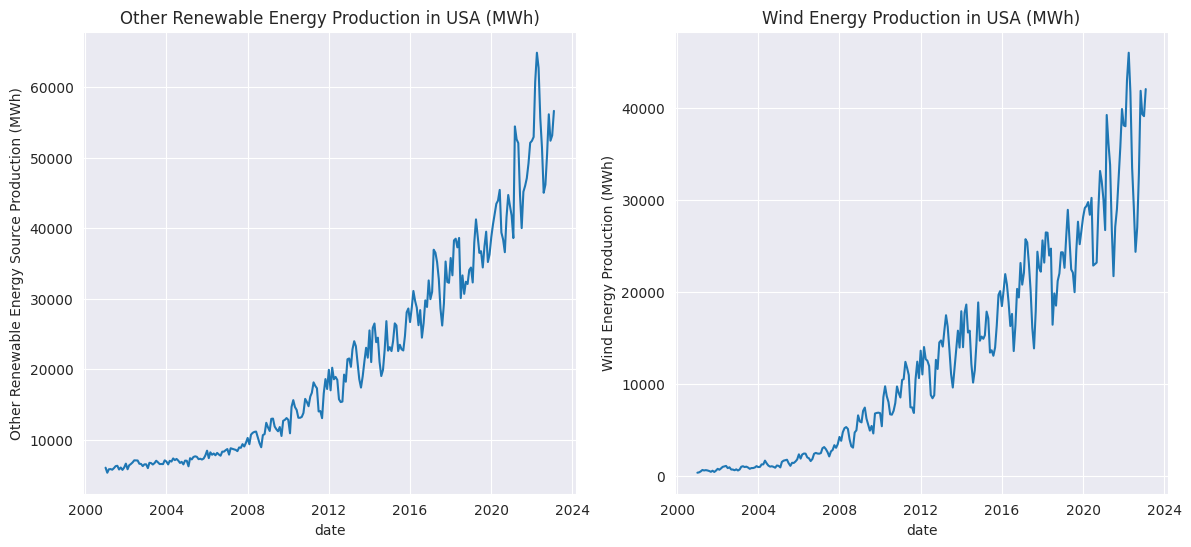

<Figure size 1400x600 with 0 Axes>

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))
plt.figure(figsize = (14,6))

sns.lineplot(x = 'date', y ='UNITED STATES other', data = data, ax = ax[0])
ax[0].set(ylabel = 'Other Renewable Energy Source Production (MWh)', title = 'Other Renewable Energy Production in USA (MWh)')

sns.lineplot(x='date', y = 'UNITED STATES wind', data = data, ax = ax[1])
ax[1].set(ylabel = 'Wind Energy Production (MWh)', title = 'Wind Energy Production in USA (MWh)')


plt.tight_layout()

Lets compare the 2020-2023 (february) time series, that is when reneweable source is peaking. This is highly likely due to the USA being one of the leading figures in promoting 'green energy'. Furthermore, Accoding to the following image, the *other* reneweable sources are: Hydropower, Solar, Biomass, and Geothermal energy, this is taken from the [office of energy efficiency and renewable energy.](https://www.energy.gov/eere/renewable-energy#:~:text=Renewable%20Energy%20in%20the%20United%20States,-Renewable%20energy%20generates&text=In%202022%2C%20solar%20and%20wind,with%20abundant%20renewable%20energy%20resources.)

---
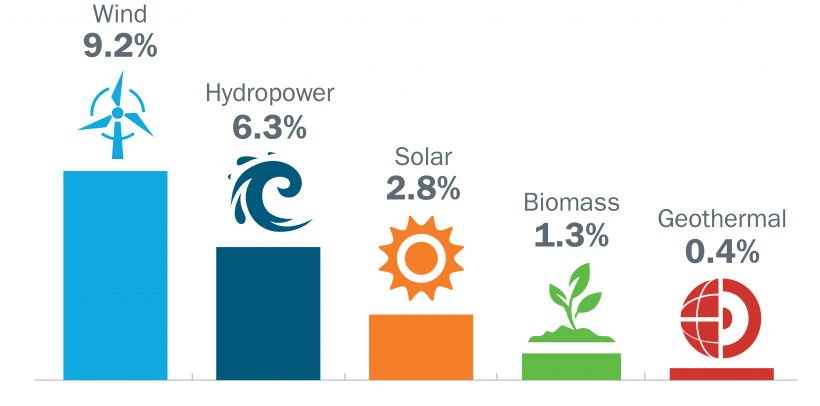

*This graph represents the distribution of renewable energy production in **2021**...*

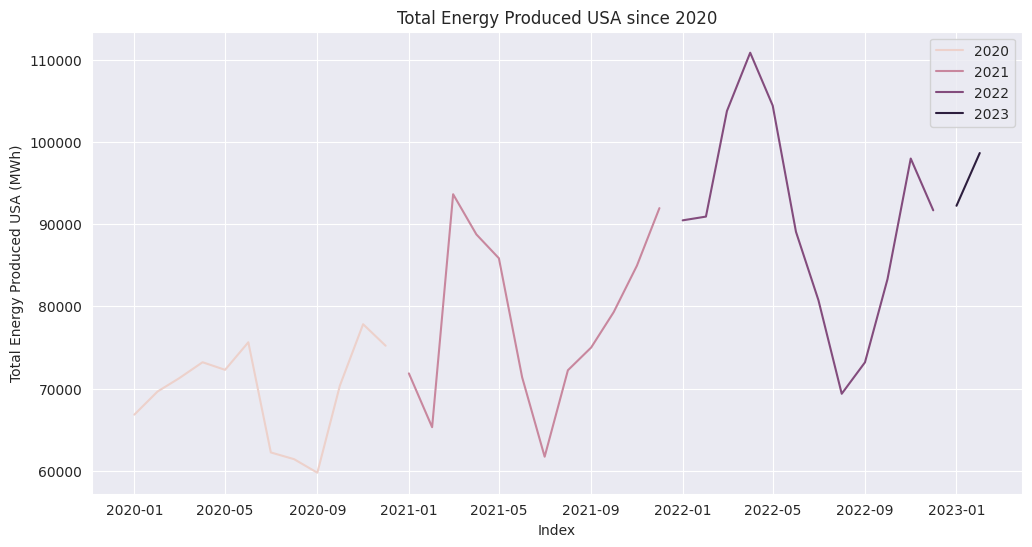

In [18]:
#data[data['Year'] >= 2020].plot(kind = 'line', y = 'Total Energy Produced USA')
latest_years = data[data['Year'] >= 2020]

plt.figure(figsize= (12,6))
sns.lineplot(x = latest_years.index, y = 'Total Energy Produced USA', data = latest_years, hue = 'Year' )
plt.title('Total Energy Produced USA since 2020')
plt.xlabel('Index')
plt.ylabel('Total Energy Produced USA (MWh)')
plt.legend()
plt.show()

It seems that from March to May to July to September each year the total production of renewable Energy significantly decreases, which then increases in the following months, this could be due to wind being significantly calmer during the summer months, the heat affecting hydropower (dam droughts) and solar energy not being as relevant to balance out these falling figures.

Let's now look at how renewable energy production differs from state to state...
---

In [19]:
data.columns.to_list()
regions_other = ['NEW ENGLAND other','MIDDLE ATLANTIC other','EAST NORTH CENTRAL other','WEST NORTH CENTRAL other','EAST SOUTH CENTRAL other','WEST SOUTH CENTRAL other',
                'PACIFIC CONTIGUOUS other','PACIFIC NONCONTIGUOUS other']
regions_wind = ['NEW ENGLAND other','MIDDLE ATLANTIC wind','EAST NORTH CENTRAL wind','WEST NORTH CENTRAL wind','EAST SOUTH CENTRAL wind','WEST SOUTH CENTRAL wind',
                'PACIFIC CONTIGUOUS wind','PACIFIC NONCONTIGUOUS wind']

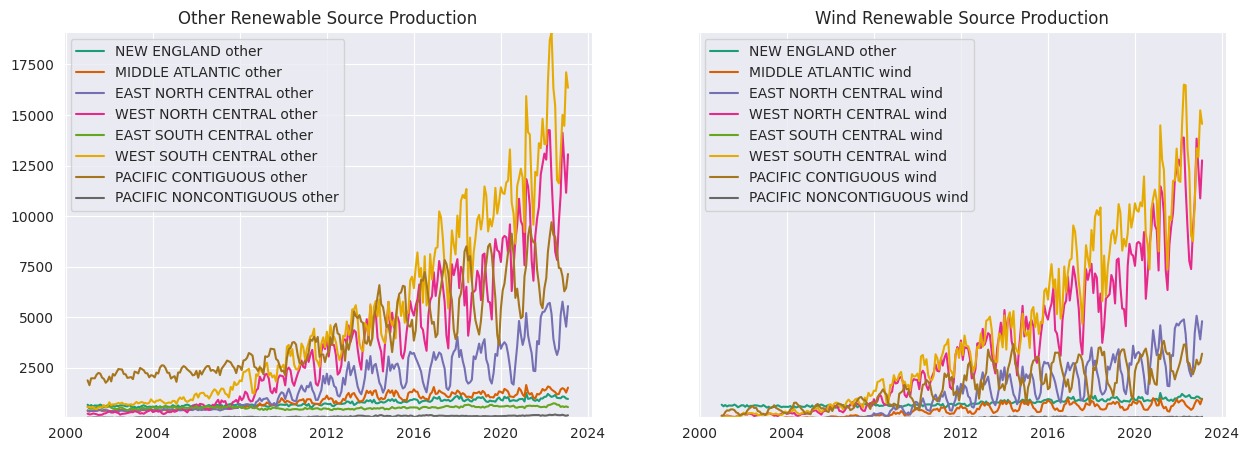

In [20]:
def plot_renewable_source_production(data, regions_other, regions_wind):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    y_min = data['WEST SOUTH CENTRAL wind'].min()
    y_max = data['WEST SOUTH CENTRAL other'].max()
    
    colors = plt.cm.Dark2(np.linspace(0, 1, len(regions_other)))  

    for i, region in enumerate(regions_other):
        axes[0].plot(data.index, data[region], color=colors[i], label=region)
    
    axes[0].set_title('Other Renewable Source Production')
    axes[0].set_ylim([y_min, y_max])
    axes[0].legend()
    
    for i, region in enumerate(regions_wind):
        axes[1].plot(data.index, data[region], color=colors[i], label=region)
    
    axes[1].set_title('Wind Renewable Source Production')
    axes[1].set_ylim([y_min, y_max])
    axes[1].legend()
    
    plt.show()
plot_renewable_source_production(data, regions_other, regions_wind)

West South Central, West North Central, and Middle Atlantic have the highest concentrations of renewable energy production. One interesting region to look at is the Pacific Contiguous region, consisting of Alaska and Hawaii. The reason for its remarkability would be the fact that it has relatively high renewable energy production and low wind production in respects to its other types of productions. A quick search revealed that 90% of Alaskas renewable was from [hydro power energy.](https://www.eia.gov/state/analysis.php?sid=AK)

The below graph further enforces the findings presented above, with there being an obvious high correlation between high wind energy and wind energy production:

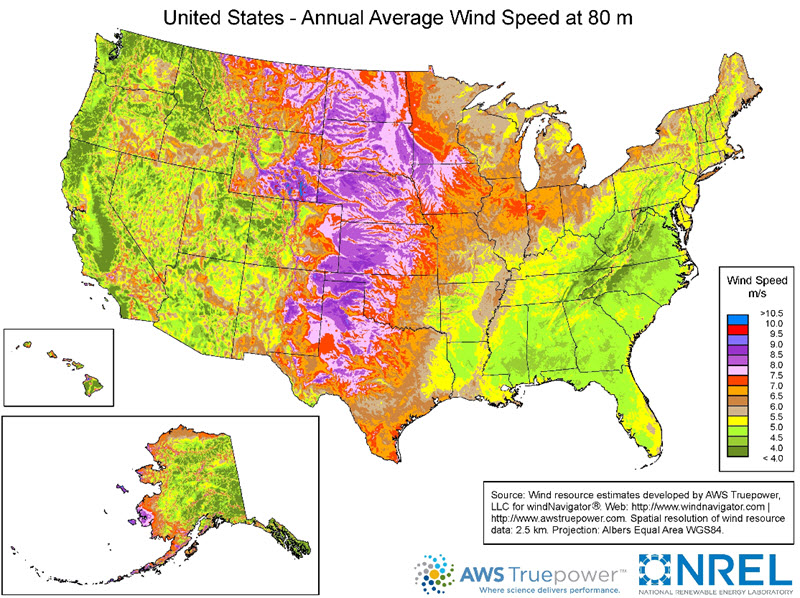

Now that we have a solid understanding of our data, lets try and create a model that would predict the wind production for the regions with the highest wind energy production (from the graph above).

# Creating our model

Test and training split
---

We will try and predict the wind energy production from January 2022 to February 2023 for West South Central and West North Central States...

In [21]:
#filtering dataset for our train test split
model_data = data[['Month','Year','WEST SOUTH CENTRAL wind', 'WEST NORTH CENTRAL wind']]
model_data['West South and Central States Wind Energy MWh'] = model_data['WEST SOUTH CENTRAL wind'] + model_data['WEST NORTH CENTRAL wind']


/tmp/ipykernel_34/3030380066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['West South and Central States Wind Energy MWh'] = model_data['WEST SOUTH CENTRAL wind'] + model_data['WEST NORTH CENTRAL wind']


In [22]:
model_data.drop(['WEST SOUTH CENTRAL wind', 'WEST NORTH CENTRAL wind'],axis = 1, inplace = True)

/tmp/ipykernel_34/1031176027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.drop(['WEST SOUTH CENTRAL wind', 'WEST NORTH CENTRAL wind'],axis = 1, inplace = True)


In [23]:
X = model_data.drop(['West South and Central States Wind Energy MWh'], axis = 1)
y = model_data['West South and Central States Wind Energy MWh']

In [24]:
X_train = X[X.index <'2022-01-01']
X_test = X[X.index >= '2022-01-01']
y_train = y[y.index < '2022-01-01']
y_test = y[y.index >= '2022-01-01']

### Creating Our model(s)

Lets create some timeseries models and plot the predictions to see which model performs the best...

In [25]:
#linear regression
from sklearn.linear_model import LinearRegression
lin_model  = LinearRegression()
lin_model.fit(X_train, y_train)
lin_pred = pd.Series(lin_model.predict(X_test), index = X_test.index)

#random forest regression
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators = 1000)
forest_model.fit(X_train, y_train)
forest_pred = pd.Series(forest_model.predict(X_test), index = X_test.index)

In [57]:
model_data_plot = model_data[model_data.index >= '2019-01-01']

<AxesSubplot: xlabel='date'>

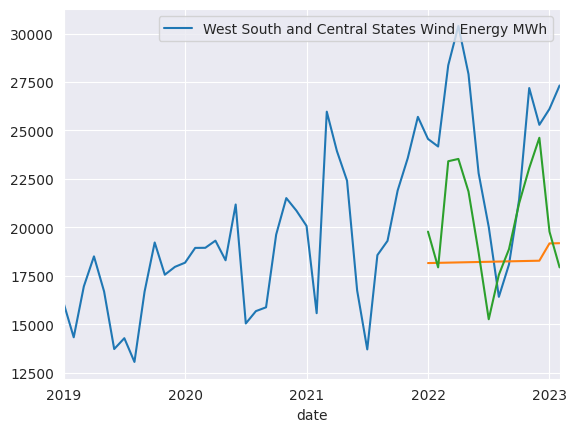

In [58]:
model_data_plot.plot(kind = 'line', y = 'West South and Central States Wind Energy MWh')
lin_pred.plot(kind = 'line')
forest_pred.plot(kind = 'line')

Random Forest Regressor is the clear better performer, since we cant have access to more data (it would be helpful if data wasnt tracked by month but by week or day...), lets hyper parameter tune it.

### Hyperparameter tuning

In [29]:
from pprint import pprint

print('Parameters to tune for our forest model: \n')
pprint(forest_model.get_params())

Parameters to tune for our forest model: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [39]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start = 10, stop = 110, num = 11)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

cv_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

forest_best = RandomizedSearchCV(estimator = forest_model, param_distributions = cv_grid, n_iter = 100)
forest_best.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(n_estimators=1000),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]})

In [41]:
forest_best.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [48]:
forest_model2 = RandomForestRegressor(n_estimators = 700,
                                     min_samples_split = 2,
                                     min_samples_leaf = 4,
                                     max_features = 'auto',
                                     max_depth = 50,
                                     bootstrap = False)

forest_model2.fit(X_train,y_train)
tuned_pred = pd.Series(forest_model2.predict(X_test), index = X_test.index)

<AxesSubplot: xlabel='date'>

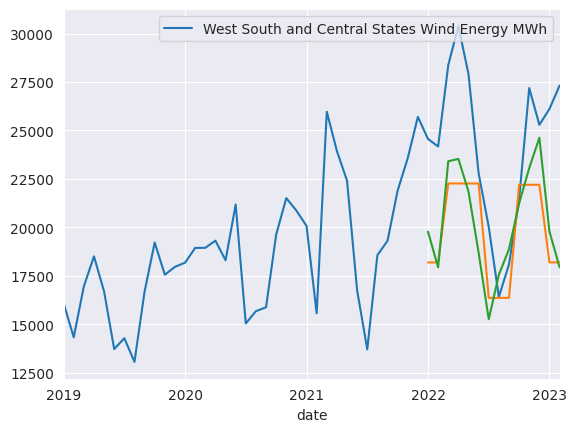

In [59]:
model_data_plot.plot(kind = 'line', y = 'West South and Central States Wind Energy MWh')
tuned_pred.plot(kind = 'line')
forest_pred.plot(kind = 'line')

It seems that, our tuned model was able to predict more the descending pattern than the standard model, however the function for it is fuzzy, this model could be improved on if we have more data such as:
* Wind Speed
* Temperature
* Different time format (Hour, Day, Week...)

and so on...